This notebook derives the transfer function of a Sallen and Key low-pass filter, and then for the Butterworth conditions, displayes a Bode plot ans step reponse.  You will want to sue the lateset veriodn of SymPy so tha thte inverse Laplace transforms do not take too long. 

In [245]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install schemdraw --user

In [246]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import schemdraw
import schemdraw.elements as elm

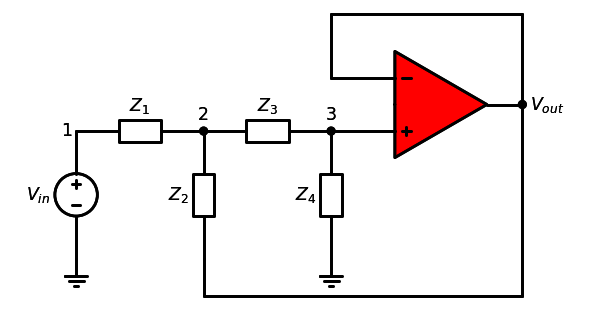

In [336]:
elm.style(elm.STYLE_IEC)
with schemdraw.Drawing(file='sallenkey.jpg',inches_per_unit=.5) as d:
    V1 = d.add(elm.SourceV().up().label('$V_{in}$'))
    R1 = d.add(elm.Resistor(lftlabel='1').right().label('$Z_1$'))
    d.add(elm.DOT,toplabel='2')
    C1 = d.add(elm.Resistor().down().label('$Z_2$'))     
    d.add(elm.GND(xy=V1.start))
    R2 = d.add(elm.Resistor(xy=R1.end).right().label('$Z_3$'))
    C2 = d.add(elm.Resistor().down().label('$Z_4$'))
    d.add(elm.GND)
    L2 = d.add(elm.Line(xy=C2.start,l=d.unit/2).right())
    d.add(elm.DOT,xy=C2.start,toplabel='3')
    op1 = d.add(elm.OPAMP,xy=L2.end,fill='red',d='right',anchor='in2')
    L3 = d.add(elm.Line(xy=op1.in1,l=d.unit/2).left())
    L4 = d.add(elm.Line(l=d.unit/2).up())
    L5= d.add(elm.Line(l=1.5*d.unit ).right())
    L6 = d.add(elm.Line(toy=op1.out,l=d.unit/2).down())
    d.add(elm.DOT,rgtlabel='$V_{out}$')
    L7 = d.add(elm.Line(tox=op1.out).left())
    L8 = d.add(elm.Line(xy=L6.end,l=1.5*d.unit).down())
    L9 = d.add(elm.Line(tox=C1.end).left())
    L10 = d.add(elm.Line(toy=C1.end).up())

Use Ohm's law to put the aboce equaiton to terms of voltages and impedences
$$
\frac{V_1-V_2}{Z_1}=\frac{V_2-V_{out}}{Z_2}+\frac{V_2-V_3}{Z_3}
$$
and
$$
\frac{V_2-V_3}{Z_3}=\frac{V_3}{Z_4}
$$
Assume an ideal opanmp and $$V_{out}=V_3$$
Rearrange to get into Matrix form:

 
$$
\frac{V_1}{Z_1}=V_2 \left(\frac{1}{Z_1}+\frac{1}{Z_2}+\frac{1}{Z_3}\right)-V_3\left(\frac{1}{Z_2}+\frac{1}{Z_3} \right)
$$
and 
$$
0=\frac{-V_2}{Z_3}+\frac{V_3}{Z_4}
$$

In [248]:
from sympy import symbols
from sympy.matrices import Matrix
from sympy import *
import sympy as sym
Z1, Z2, Z3, Z4 = symbols("Z1, Z2, Z3, Z4")
I1, I2, I3, I4, V1, V2, V3,Vin= symbols("I1, I2, I3, I4, V1, V2, V3,Vin")

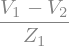

In [249]:
I1=(V1-V2)/Z1
I1

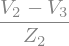

In [250]:
I2=(V2-V3)/Z2
I2

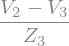

In [251]:
I3=(V2-V3)/Z3
I3

In [252]:
I4=V3/Z4
I4

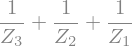

In [253]:
a11=(-I1+I2+I3).expand().coeff(V2, 1)
a11

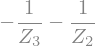

In [254]:
a12=(-I1+I2+I3).expand().coeff(V3, 1)
a12

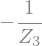

In [255]:
a21=(-I3+I4).expand().coeff(V2, 1)
a21

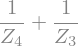

In [256]:
a22=(-I3+I4).expand().coeff(V3, 1)
a22

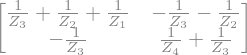

In [257]:
A_SK = Matrix([[a11,a12], [a21, a22]])
A_SK

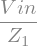

In [258]:
b0=(I1+I2+I3).expand().coeff(V1, 1)*Vin
b0

In [259]:
b0=(I1+I2+I3).expand().coeff(V1, 1)*Vin
b1=(-I3+I4).expand().coeff(V1, 1)
b1

In [260]:
 B=Matrix([b0,b1])

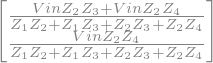

In [261]:
Sol_SK=A_SK.solve(B)
Sol_SK

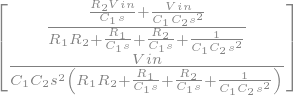

In [262]:
R1, R2, C1, C2, = symbols("R1, R2, C1, C2 ",real=True, positive=True)
s= symbols("s", positive=True)
Sol_SK=Sol_SK.subs(Z1,R1)
Sol_SK=Sol_SK.subs(Z2,1/s/C1)
Sol_SK=Sol_SK.subs(Z3,R2)
Sol_SK=Sol_SK.subs(Z4,1/s/C2)
Sol_SK

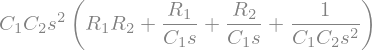

In [263]:
num,de=fraction(Sol_SK[1])
de

In [264]:
de=de.expand()
de

In [265]:
s2=de.coeff(s,2)
s2

In [266]:
s1=de.coeff(s,1)
s1

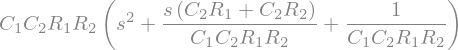

In [267]:
s0=de.coeff(s,0)
s0
sym.init_printing(order='lex')
D=s2*(s**2+s*(s1)/s2+s0/s2)
D


$$ \left( \frac{R_1C_2+R_2C_2}{R_1R_2C_1C_2}\right)^2<\frac{4}{R_1R_2C_1C_2}  $$

$$ \left( \frac{R_1C_2+R_2C_2}{1}\right)^2<\frac{4R_1R_2C_1C_2}{1}  $$
Notice that the varible C1 does not appear in the left hand side of the eppression.  This means that the damping can be set to any value, as ooposed to the RCRC circuit.
There are 4 variables.  Simplify the analisys by: m has to be a real, positve number.
$$R_2=Rm$$
$$C_2+C/m$$
$$R_1=R$$
$$C_1=C$$
$$ \left(RC/m+RC \right)^2<4R^2C^2  $$

If we let $$0<m<\infty$$ then we can control the types of poles the sytem prodcues.

It is easier to use this notation to design low pass filters.
$$
H(s)=\frac{\omega_0^2}{s^2+2 \zeta \omega_0 s+ \omega_0^2}
$$

$$
2 \zeta \omega_0 =\frac{1}{C_1} \times \frac{R_1+R_2}{R_1R_2}
$$

$$
\omega_0=\sqrt{R_1R_2C_1C_2}
$$
There are four variables and two unknowns. Use the scale facotor method to link the resistances and capacitances
$$
R_1=mR,
R_2=R/m, C_1=nC, C_2=C/n
$$
The variables n and m are poitive real numbers.
$$
\omega_0=2 \pi f_0 =\frac{1}{RC}
$$

$$
2 \zeta \omega_0=\frac{1}{C_1} \times \frac{R_1+R_2}{R_1R_2}
$$

$$
2 \zeta \omega_0=\frac{1}{nC} \times \frac{Rm+R/m}{R^2}=\frac{m+1/m}{nCR}
$$
Substitute 
$$
\zeta=\frac{m+1/m}{2n}=\frac{m^2+1}{2mn}
$$
A butterworth filter has comple poles and -3dB at the curoff frequency (as opposed toi -6dB or critcally damped.)
Assume an m and calculate n:



In [284]:
import numpy as np
m=1
zeta=1/np.sqrt(2)
# set n to 10**.5 so tha the capacitors come our one order of magnitude different
# Also set base capacitor to .31622776601e-6 so the capacitros are in powers of 10.
n=3.16227766017
# Selcting n first to get the cpacitors to scale properly, you have to use the quadratic equaiton to solve for m,
R=np.roots([1,-2*zeta*n,1])
m=R[0]
m


In [312]:
#set wo
wo=1
# This value of C will scale to powers of 10 if n=3.16227766017
#You will have to change the exponent of this vlaue to get reasonable R vlaues.
C=31.622776601e-6
#Solve for R
R=1/C/wo
R

In [318]:
r1=m*R
r1

In [319]:
r2=R/m
r2

In [320]:
c1=n*C
c1
c1

In [321]:
c2=C/n
c2

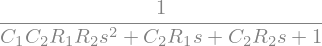

In [322]:
H_LP=Sol_SK[1].expand()/Vin
H_LP

In [323]:

import sympy as sympy
num, de=fraction(H_LP)
de=de.subs(R1,r1)
de=de.subs(C1,c1)
de=de.subs(R2,r2)
de=de.subs(C2,c2)

num=num.subs(R1,r1)
num=num.subs(C1,c1)
num=num.subs(R2,r2)
num=num.subs(C2,c2)

poles=roots(de,s)
zeros=roots(num,s)
de_o = degree(de)
num_o = degree(num) 
Gain=float(num.coeff(s,num_o)/de.coeff(s,de_o))

de*Gain
(1/10e3/1e-6)**2

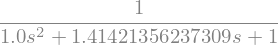

In [324]:
G=sympy.Rational(num.coeff(s,num_o)/de.coeff(s,de_o)).limit_denominator(1000) 
dem=de*G
numm=num*G
for i in de.atoms(sympy.Float):
        r = sympy.Rational(i).limit_denominator(1000)
        de = de.subs(i, r)
for i in num.atoms(sympy.Float):
        r = sympy.Rational(i).limit_denominator(1000)
        num = num.subs(i, r) 
#N=sympy.Rational(num*G).limit_denominator(1000) 
#num.coeff(s,num_o)
#num
numm/dem

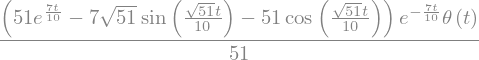

In [333]:
t=symbols("t",real=true)
s=symbols("s",positive=true)
G=1/s
H=numm/dem
# We have to turn the floats into rationals or the inverse laplace might not work.
#limit_denominator(1000) too slow
#limit_denominator(1) fast but not accurate 
#limit_denominator(10)just right
for i in H.atoms(sympy.Float):
        r = sympy.Rational(i).limit_denominator(10)
        H = H.subs(i, r)
F=apart(H*G,s)
for i in F.atoms(sympy.Float):
        r = sympy.Rational(i).limit_denominator(10)
        F = F.subs(i, r)
z=inverse_laplace_transform(F,s,t).simplify()
z

In [334]:
# Go though list of poles and zeros and make a list for the Bod plot function.
D=[]
for i in range(de_o+1):
    D.append(float(dem.coeff(s,de_o-i)))
    if (de_o-i)==0:
        wo=np.sqrt(float(dem.coeff(s,de_o-i)))
N=[]    
for i in range(num_o+1):
    N.append(float(dem.coeff(s,num_o-i)))
N

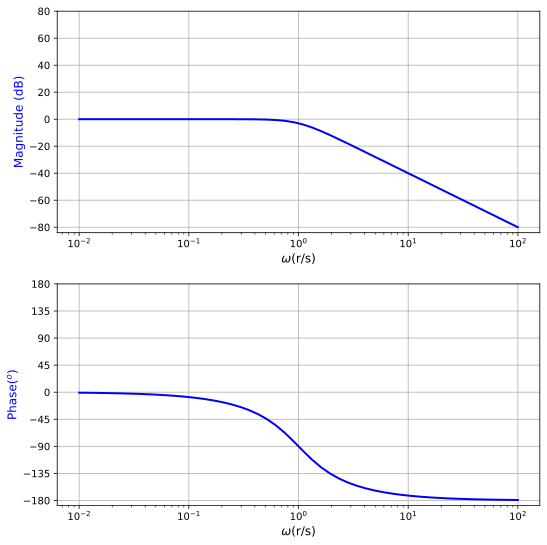

In [335]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
# N and D are a list of zeros and poles
#N=[10000]
#D=[1.0, 141.421356237309, 10000]
# autmoatically find the plotting range.
wo_min=(np.log10(wo))
wo_max=(np.log10(wo))
w=np.logspace(wo_min-2,wo_max+2,50)
#Create system that in zero, pole and gain format.
system = signal.TransferFunction(N, D)
#Create Bode plot object
w, mag, phase = signal.bode(system,w)
#Create Bode Plot
axis_color = 'lightgoldenrodyellow'
 
fig, (ax, ax1) = plt.subplots(2,1,figsize=(8,8)) 
fig.subplots_adjust(left=0.25, bottom=0.25)
[line] = ax.semilogx(w,mag, linewidth=2, color='blue')

ax.set_xlabel('$\omega$(r/s)',fontsize=12)
ax.set_ylabel('Magnitude (dB)', color='b', fontsize=12) 
 
[line1] = ax1.semilogx(w,phase, linewidth=2, color='blue')
ax1.set_ylabel('Phase($^o$)', color='b', fontsize=12 ) 
ax1.set_xlabel('$\omega$(r/s)',fontsize=12)
ax1.yaxis.set_ticks(np.arange(-180,225, 45.0))
ax.yaxis.set_ticks(np.arange(-80,90, 20.0))
ax.grid()
ax1.grid()
plt.tight_layout(pad=2, w_pad=2, h_pad=1.0)
plt.show()

How to design a 2'nd order filter can be found here here:

[Sallen and Key Filter](https://en.wikipedia.org/wiki/Sallen%E2%80%93Key_topology)

Also Analog Devices has a design wizard that is very useful:
[ADI Filter wizard](https://tools.analog.com/en/filterwizard/)

f(t)=(51*exp(7*t/10) - 7*sqrt(51)*sin(sqrt(51)*t/10) - 51*cos(sqrt(51)*t/10))*exp(-7*t/10)*Heaviside(t)/51


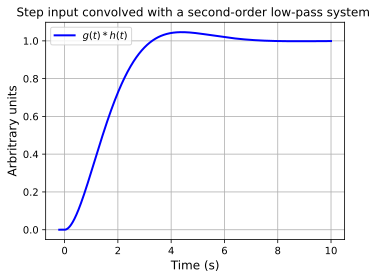

In [332]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
f=z
print('f(t)={}'.format(f)) 
N=1000
wo=np.sqrt(r1*r2*c1*c2)
t_start=-.2*wo
t_end=10*wo
time=np.linspace( t_start,t_end,N)
flam = lambdify(t, f, "numpy")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
legend='$g(t)*h(t) $'
[line] = ax.plot(time, flam(time), linewidth=2, color='blue',label=legend)
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
ax.legend()
ax.set_title('Step input convolved with a second-order low-pass system ')
ax.grid()
plt.show() 

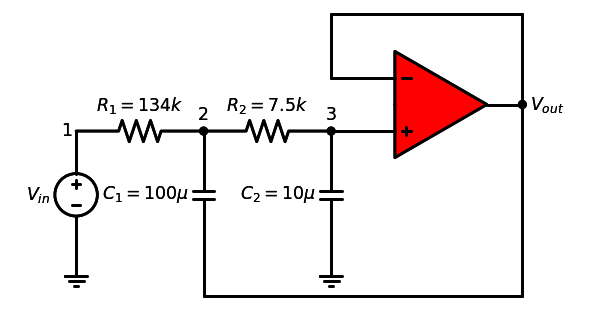

In [341]:
elm.style(elm.STYLE_IEEE)
with schemdraw.Drawing(file='sallenkey.jpg',inches_per_unit=.5) as d:
    V1 = d.add(elm.SourceV().up().label('$V_{in}$'))
    R1 = d.add(elm.Resistor(lftlabel='1').right().label('$R_1=134k$'))
    d.add(elm.DOT,toplabel='2')
    C1 = d.add(elm.Capacitor().down().label('$C_1=100 \mu $'))     
    d.add(elm.GND(xy=V1.start))
    R2 = d.add(elm.Resistor(xy=R1.end).right().label('$R_2=7.5k$'))
    C2 = d.add(elm.Capacitor().down().label('$C_2=10 \mu$'))
    d.add(elm.GND)
    L2 = d.add(elm.Line(xy=C2.start,l=d.unit/2).right())
    d.add(elm.DOT,xy=C2.start,toplabel='3')
    op1 = d.add(elm.OPAMP,xy=L2.end,fill='red',d='right',anchor='in2')
    L3 = d.add(elm.Line(xy=op1.in1,l=d.unit/2).left())
    L4 = d.add(elm.Line(l=d.unit/2).up())
    L5= d.add(elm.Line(l=1.5*d.unit ).right())
    L6 = d.add(elm.Line(toy=op1.out,l=d.unit/2).down())
    d.add(elm.DOT,rgtlabel='$V_{out}$')
    L7 = d.add(elm.Line(tox=op1.out).left())
    L8 = d.add(elm.Line(xy=L6.end,l=1.5*d.unit).down())
    L9 = d.add(elm.Line(tox=C1.end).left())
    L10 = d.add(elm.Line(toy=C1.end).up())

An LTspice file can be found here:
[Sallen and Key Low Pass Filter](https://github.com/davidparent/Circuits-and-Systems/blob/main/20230328%20Sallen%20Key%20Butterworth%20radian%20step.asc)